<a href="https://colab.research.google.com/github/Geetesh08/Stock-Prediction-Using-SVM/blob/main/StockMarketPriceDirectionPredictorUsingSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-9f791fe7e644>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving RELIANCE.NS.csv to RELIANCE.NS.csv


In [ ]:


import io

df = pd.read_csv(io.BytesIO(uploaded['RELIANCE.NS.csv']))
print(df)

           Date         Open         High          Low        Close  \
0    2023-04-05  2167.203125  2167.203125  2130.791016  2146.758789   
1    2023-04-06  2139.651611  2172.741211  2139.651611  2161.157471   
2    2023-04-10  2169.049316  2169.418457  2142.789795  2145.835693   
3    2023-04-11  2154.281250  2160.742188  2145.097412  2156.450195   
4    2023-04-12  2156.450195  2185.478516  2150.635498  2165.957275   
..          ...          ...          ...          ...          ...   
241  2024-03-28  2985.750000  3011.899902  2957.300049  2971.699951   
242  2024-04-01  2984.949951  2987.949951  2965.000000  2969.550049   
243  2024-04-02  2968.000000  2988.000000  2950.000000  2973.899902   
244  2024-04-03  2964.149902  2968.899902  2937.800049  2943.199951   
245  2024-04-04  2959.500000  2959.500000  2900.000000  2925.850098   

       Adj Close    Volume  
0    2139.202148   8131464  
1    2153.550049   9217523  
2    2138.282227   6480704  
3    2148.859375   5271183  
4 

In [ ]:

# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-05,2167.203125,2167.203125,2130.791016,2146.758789,2139.202148,8131464
2023-04-06,2139.651611,2172.741211,2139.651611,2161.157471,2153.550049,9217523
2023-04-10,2169.049316,2169.418457,2142.789795,2145.835693,2138.282227,6480704
2023-04-11,2154.281250,2160.742188,2145.097412,2156.450195,2148.859375,5271183
2023-04-12,2156.450195,2185.478516,2150.635498,2165.957275,2158.333008,9089543
...,...,...,...,...,...,...
2024-03-28,2985.750000,3011.899902,2957.300049,2971.699951,2971.699951,10927182
2024-04-01,2984.949951,2987.949951,2965.000000,2969.550049,2969.550049,2506940
2024-04-02,2968.000000,2988.000000,2950.000000,2973.899902,2973.899902,4455083


In [ ]:

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2023-04-05,20.444336,36.412109
2023-04-06,-21.505860,33.089600
2023-04-10,23.213623,26.628662
2023-04-11,-2.168945,15.644776
2023-04-12,-9.507080,34.843018


In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0])

In [ ]:

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:

# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:

df['Predicted_Signal'] = cls.predict(X)

In [ ]:

# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [ ]:

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [ ]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2023-04-05,2167.203125,2167.203125,2130.791016,2146.758789,2139.202148,8131464,20.444336,36.412109,1,NaN,NaN,NaN
2023-04-06,2139.651611,2172.741211,2139.651611,2161.157471,2153.550049,9217523,-21.505860,33.089600,1,0.006707,0.006707,0.006707
2023-04-10,2169.049316,2169.418457,2142.789795,2145.835693,2138.282227,6480704,23.213623,26.628662,1,-0.007090,-0.007090,-0.000382
2023-04-11,2154.281250,2160.742188,2145.097412,2156.450195,2148.859375,5271183,-2.168945,15.644776,1,0.004947,0.004947,0.004564
2023-04-12,2156.450195,2185.478516,2150.635498,2165.957275,2158.333008,9089543,-9.507080,34.843018,1,0.004409,0.004409,0.008973
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28,2985.750000,3011.899902,2957.300049,2971.699951,2971.699951,10927182,14.050049,54.599853,0,-0.004689,-0.004689,0.341248
2024-04-01,2984.949951,2987.949951,2965.000000,2969.550049,2969.550049,2506940,15.399902,22.949951,1,-0.000723,-0.000000,0.340525
2024-04-02,2968.000000,2988.000000,2950.000000,2973.899902,2973.899902,4455083,-5.899902,38.000000,1,0.001465,0.001465,0.341989


In [ ]:

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2023-04-05,2167.203125,2167.203125,2130.791016,2146.758789,2139.202148,8131464,20.444336,36.412109,1,NaN,NaN,NaN,NaN
2023-04-06,2139.651611,2172.741211,2139.651611,2161.157471,2153.550049,9217523,-21.505860,33.089600,1,0.006707,0.006707,0.006707,0.006707
2023-04-10,2169.049316,2169.418457,2142.789795,2145.835693,2138.282227,6480704,23.213623,26.628662,1,-0.007090,-0.007090,-0.000382,-0.000382
2023-04-11,2154.281250,2160.742188,2145.097412,2156.450195,2148.859375,5271183,-2.168945,15.644776,1,0.004947,0.004947,0.004564,0.004564
2023-04-12,2156.450195,2185.478516,2150.635498,2165.957275,2158.333008,9089543,-9.507080,34.843018,1,0.004409,0.004409,0.008973,0.008973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28,2985.750000,3011.899902,2957.300049,2971.699951,2971.699951,10927182,14.050049,54.599853,0,-0.004689,-0.004689,0.341248,0.434332
2024-04-01,2984.949951,2987.949951,2965.000000,2969.550049,2969.550049,2506940,15.399902,22.949951,1,-0.000723,-0.000000,0.340525,0.434332
2024-04-02,2968.000000,2988.000000,2950.000000,2973.899902,2973.899902,4455083,-5.899902,38.000000,1,0.001465,0.001465,0.341989,0.435797


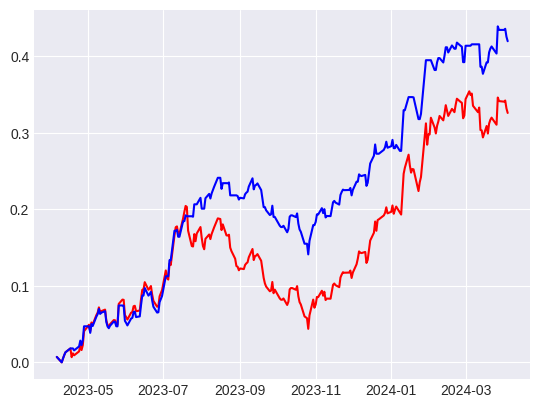

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')